# <h1><center>Heart Disease Prediction</center></h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('heart.csv')
data.head() 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

### Preprocessing

In [4]:
# Checking for null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [6]:
data['slope'].value_counts()

1    482
2    469
0     74
Name: slope, dtype: int64

In [7]:
data['ca'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

In [8]:
data['thal'].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [9]:
data['exang'].value_counts()

0    680
1    345
Name: exang, dtype: int64

In [10]:
data['restecg'].value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

In [11]:
data.shape

(1025, 14)

In [12]:
# to get the data types of each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Pandas profiling

Pandas profiing is an open source python module to generate profile reports from a pandas dataframe. We can quickly do an exploratory analysis with just 2 lines of code. However, this is just an additional line of code. Below, I have also done a manual exploratory analysis. 

In [13]:
from pandas_profiling import ProfileReport

In [14]:
profile = ProfileReport(data, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
# checking for any duplicate values
data_dup = data.duplicated().any()
print(data_dup)

True


In [16]:
data = data.drop_duplicates()
data.shape

(302, 14)

After dropping the duplicate values, we are left with 302 records in the dataframe. 

In [17]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

#### Separating target and input features

In [18]:
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [19]:
# Dropping the target column
x =data.drop(['target'], axis=1)
x.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2

In [20]:
# Creating a new dataframe 'y' consisting of the target column.
y = data[['target']]
y.head()

target
0       0
1       0
2       0
3       0
4       0

### Feature Selection

#### Pearson correlatrion coefficient
For feature selection, I used the Pearson correlation coefficient method.

In [21]:
data.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.094962 -0.063107  0.283121  0.207216  0.119492   
sex      -0.094962  1.000000 -0.051740 -0.057647 -0.195571  0.046022   
cp       -0.063107 -0.051740  1.000000  0.046486 -0.072682  0.096018   
trestbps  0.283121 -0.057647  0.046486  1.000000  0.125256  0.178125   
chol      0.207216 -0.195571 -0.072682  0.125256  1.000000  0.011428   
fbs       0.119492  0.046022  0.096018  0.178125  0.011428  1.000000   
restecg  -0.111590 -0.060351  0.041561 -0.115367 -0.147602 -0.083081   
thalach  -0.395235 -0.046439  0.293367 -0.048023 -0.005308 -0.007169   
exang     0.093216  0.143460 -0.392937  0.068526  0.064099  0.024729   
oldpeak   0.206040  0.098322 -0.146692  0.194600  0.050086  0.004514   
slope    -0.164124 -0.032990  0.116854 -0.122873  0.000417 -0.058654   
ca        0.302261  0.113060 -0.195356  0.099248  0.086878  0.144935   
thal      0.065317  0.211452 -0.160370  0.062870  0.096810 -0.032752   
target   -0.221476 -0.283609  0.432080 -0.146269 -0.081437 -0.026826   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.111590 -0.395235  0.093216  0.206040 -0.164124  0.302261   
sex      -0.060351 -0.046439  0.143460  0.098322 -0.032990  0.113060   
cp        0.041561  0.293367 -0.392937 -0.146692  0.116854 -0.195356   
trestbps -0.115367 -0.048023  0.068526  0.194600 -0.122873  0.099248   
chol     -0.147602 -0.005308  0.064099  0.050086  0.000417  0.086878   
fbs      -0.083081 -0.007169  0.024729  0.004514 -0.058654  0.144935   
restecg   1.000000  0.041210 -0.068807 -0.056251  0.090402 -0.083112   
thalach   0.041210  1.000000 -0.377411 -0.342201  0.384754 -0.228311   
exang    -0.068807 -0.377411  1.000000  0.286766 -0.256106  0.125377   
oldpeak  -0.056251 -0.342201  0.286766  1.000000 -0.576314  0.236560   
slope     0.090402  0.384754 -0.256106 -0.576314  1.000000 -0.092236   
ca       -0.083112 -0.228311  0.125377  0.236560 -0.092236  1.000000   
thal     -0.010473 -0.094910  0.205826  0.209090 -0.103314  0.160085   
target    0.134874  0.419955 -0.435601 -0.429146  0.343940 -0.408992   

              thal    target  
age       0.065317 -0.221476  
sex       0.211452 -0.283609  
cp       -0.160370  0.432080  
trestbps  0.062870 -0.146269  
chol      0.096810 -0.081437  
fbs      -0.032752 -0.026826  
restecg  -0.010473  0.134874  
thalach  -0.094910  0.419955  
exang     0.205826 -0.435601  
oldpeak   0.209090 -0.429146  
slope    -0.103314  0.343940  
ca        0.160085 -0.408992  
thal      1.000000 -0.343101  
target   -0.343101  1.000000

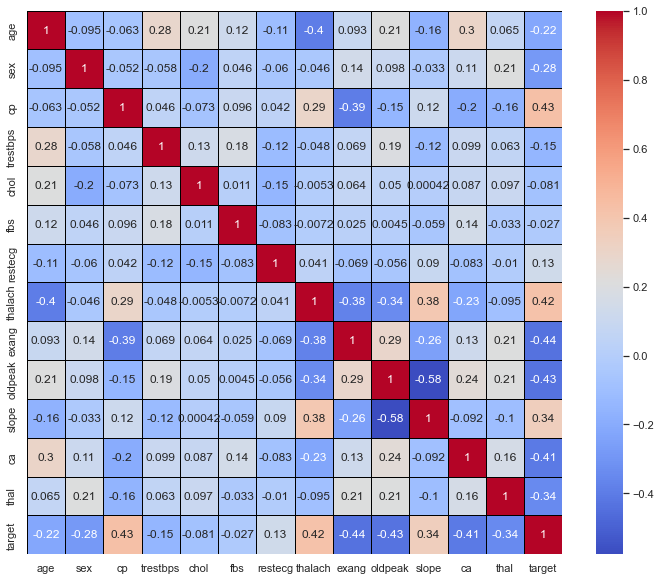

In [22]:
# Correlation Heatmap 
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.show()

In [23]:
# with the following function, we can select highly correlated features

def correlation(data_, threshold):
  
    corr_ = set()  
    corr_mat = data_.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i, j]) > threshold: 
                # getting the name of column
                colname = corr_mat.columns[i]  
                corr_.add(colname)
    return corr_

In [24]:
# This will give us the numner of features that are below the threshold(0.5) and can be dropped
corr_features = correlation(data, 0.5)
len(set(corr_features))



1

In [25]:
# To get the features that can be dropped  
corr_features



{'slope'}

In [26]:
# Dropping the highly correlated feature 'slope'

x_1 = x.drop(corr_features,axis=1)
x_1.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ca  \
0   52    1   0       125   212    0        1      168      0      1.0   2   
1   53    1   0       140   203    1        0      155      1      3.1   0   
2   70    1   0       145   174    0        1      125      1      2.6   0   
3   61    1   0       148   203    0        1      161      0      0.0   1   
4   62    0   0       138   294    1        1      106      0      1.9   3   

   thal  
0     3  
1     3  
2     3  
3     3  
4     2

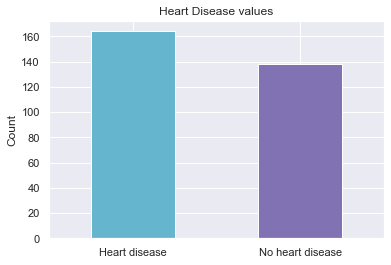

In [27]:
fig = data.target.value_counts().plot(kind = 'bar', color=["c", "m"])
fig.set_xticklabels(labels=['Heart disease', "No heart disease"], rotation=0);
plt.title("Heart Disease values")
plt.ylabel("Count");

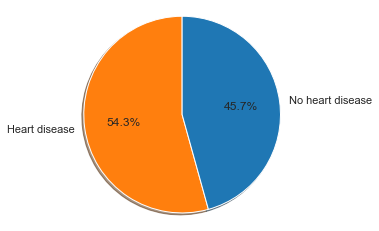

In [28]:
# Visualising in a pie chart 
labels = "Heart disease", "No heart disease"
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(data.target.value_counts(), explode=explode, labels=labels, colors=['tab:orange', 'tab:blue'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### Visualisation of categorical features

I have created a function below which would plot the pie chart and the bar plot portraying the counts of all the categorical features. 

In [29]:
def categorical_plot(feature_name):

    feature_value=data[feature_name].value_counts().values
    feature_index=data[feature_name].value_counts().index

    plt.figure(figsize=(15,5))
    plt.style.use('fivethirtyeight')
    plt.suptitle('Distribution of categorical feature : {}'.format(feature_name) , fontweight='heavy')
    # Visualisation using pie chart 
    plt.subplot(1,2,1)
    plt.pie(feature_value , labels=feature_index,autopct='%1.1f%%')
    plt.title('pie chart')


    # Visualisation using bar plot 
    plt.subplot(1,2,2)
    plt.bar(x=feature_index,height=feature_value,color=['orange','#7eb54e','skyblue','darksalmon','yellow'])
    plt.xticks(feature_index)
    plt.title('bar chart')


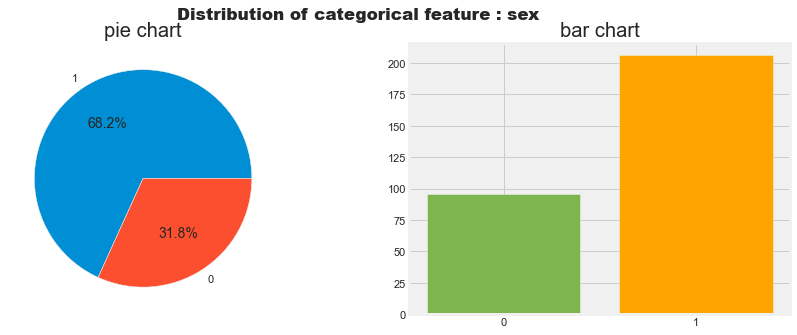

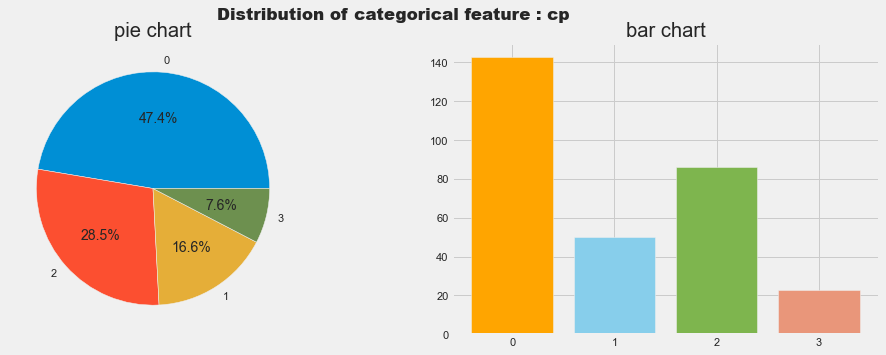

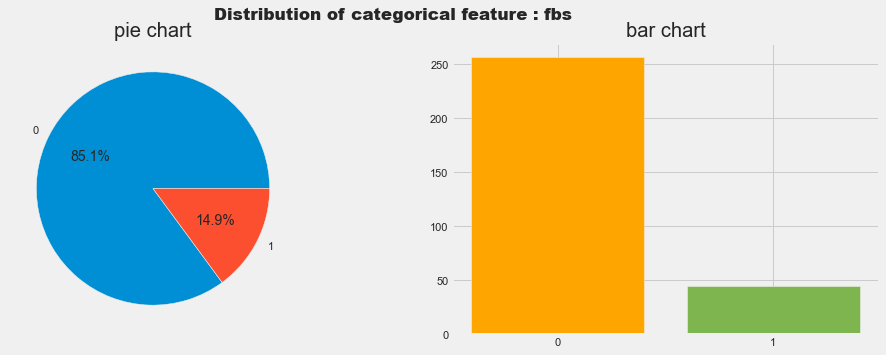

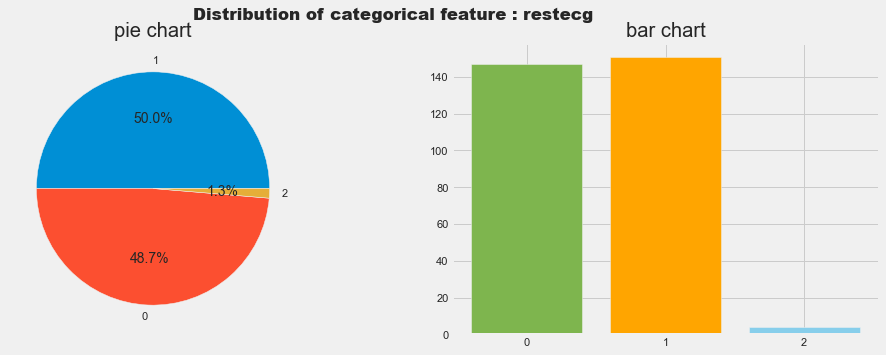

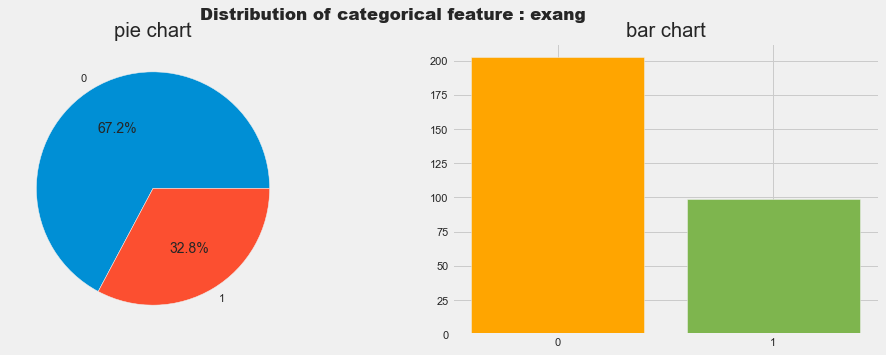

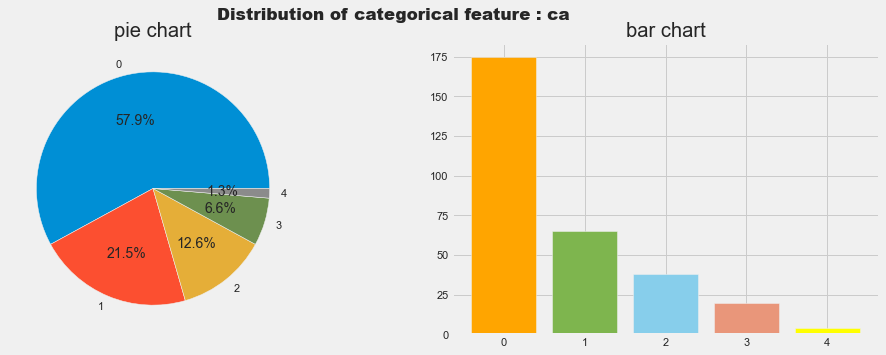

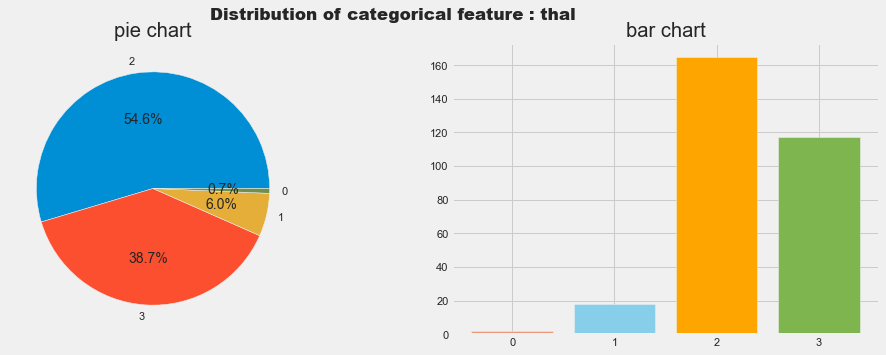

In [30]:
categorical_features=['sex','cp','fbs','restecg','exang','ca','thal' ]
list(map(categorical_plot,categorical_features))
plt.show()

### Visualisation of Continuous features
For continuous featuures, I have created a function that would plot a histogram and a boxplot for each feature.

In [31]:
def continuous_plot(feature_name):
    plt.figure(figsize=(15,5))
    plt.suptitle('Distribution of numerical feature : {}'.format(feature_name), fontweight='heavy')
    plt.style.use('seaborn-dark-palette')
    plt.subplot(1,2,1)
    sns.histplot(data=data,x=feature_name , kde=True, color= 'tab:blue')
    
    plt.subplot(1,2,2)
    sns.boxenplot(data=data , x=feature_name,linewidth=1.5, color='orange')

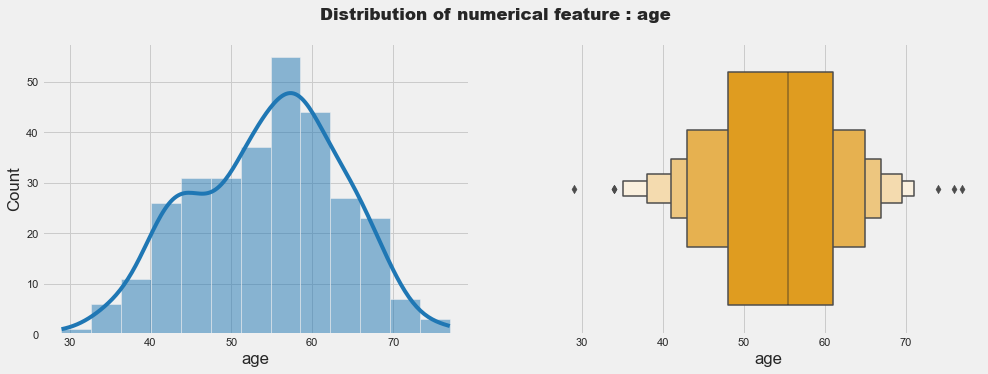

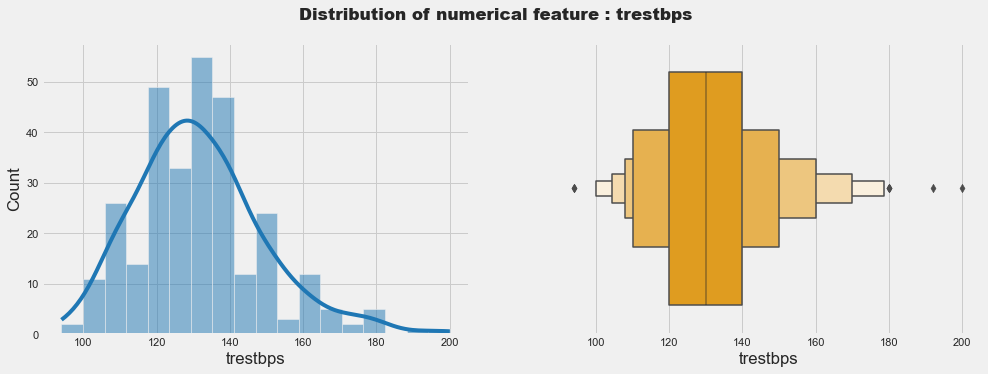

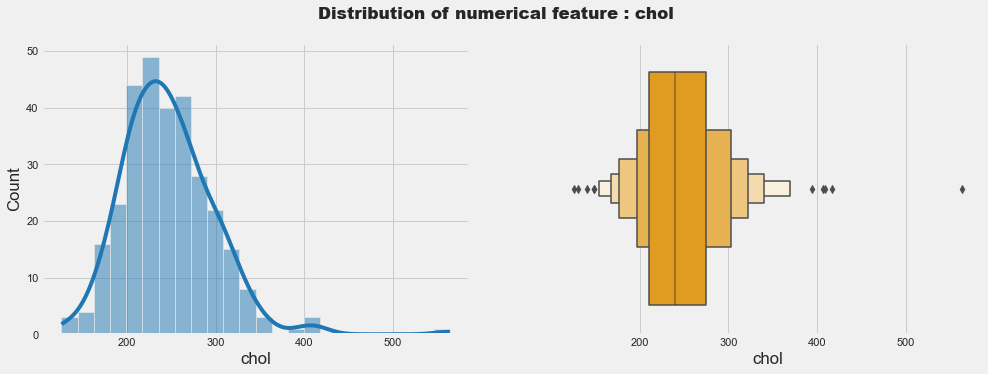

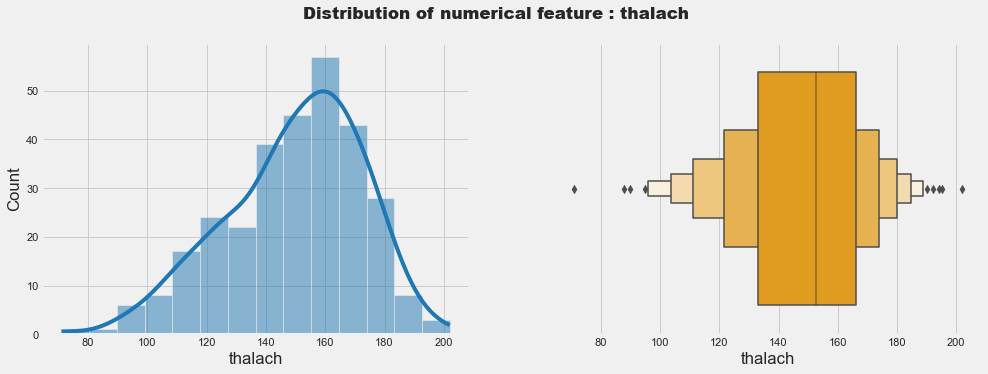

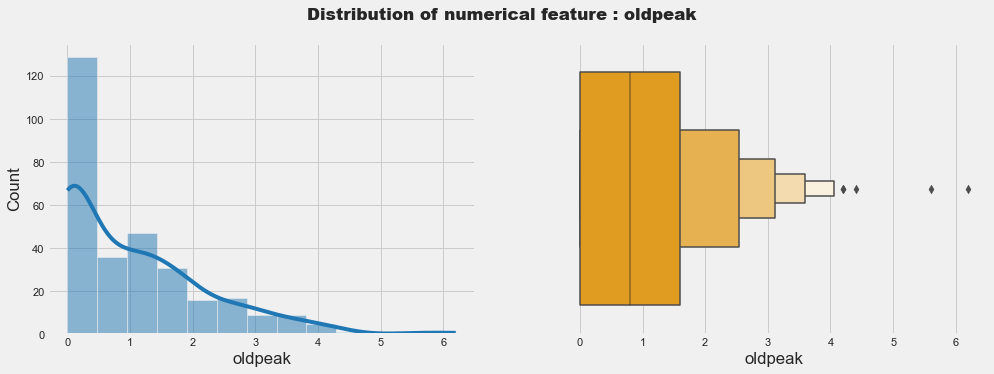

In [32]:
continuous_features=['age','trestbps', 'chol' , 'thalach','oldpeak']
list(map(continuous_plot,continuous_features))
plt.show()

### K-means implementation

In [33]:
import numpy as np
from sklearn.cluster import KMeans

In [34]:
x_1.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ca  \
0   52    1   0       125   212    0        1      168      0      1.0   2   
1   53    1   0       140   203    1        0      155      1      3.1   0   
2   70    1   0       145   174    0        1      125      1      2.6   0   
3   61    1   0       148   203    0        1      161      0      0.0   1   
4   62    0   0       138   294    1        1      106      0      1.9   3   

   thal  
0     3  
1     3  
2     3  
3     3  
4     2

In [35]:
y.head()

target
0       0
1       0
2       0
3       0
4       0

#### Elbow method to determine the number of clusters

In [36]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x_1)
    Sum_of_squared_distances.append(km.inertia_)

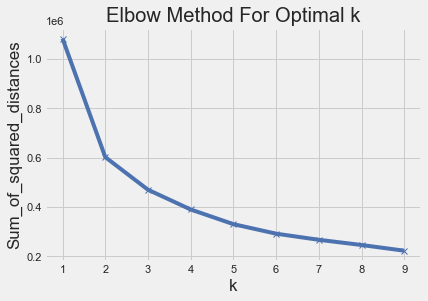

In [37]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the above elbow methos, we see that the optimal number of clusters is 2. 

In [38]:
X = x_1.iloc[:, :].values

In [39]:
X

array([[52. ,  1. ,  0. , ...,  1. ,  2. ,  3. ],
       [53. ,  1. ,  0. , ...,  3.1,  0. ,  3. ],
       [70. ,  1. ,  0. , ...,  2.6,  0. ,  3. ],
       ...,
       [52. ,  1. ,  0. , ...,  0. ,  1. ,  3. ],
       [59. ,  1. ,  3. , ...,  0. ,  0. ,  2. ],
       [54. ,  1. ,  0. , ...,  1.4,  1. ,  3. ]])

In [40]:
# implementing k-means with k=2
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X)
print(labels)

[1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0
 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1
 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1
 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 0 1 1 1 0 1]


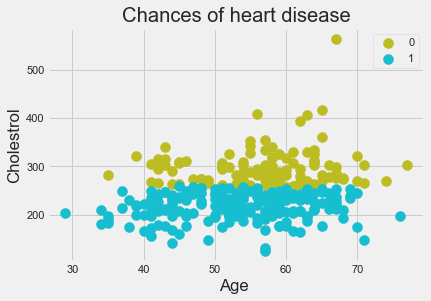

In [41]:
# getting a scatter plot to compare cholestrol and age
import matplotlib.pyplot as plt
plt.scatter(X[labels == 0, 0], X[labels == 0,4], s = 100, c='tab:olive', label = '0')
plt.scatter(X[labels == 1, 0], X[labels == 1, 4], s = 100, c='tab:cyan', label = '1')
plt.title('Chances of heart disease')
plt.xlabel('Age ')
plt.ylabel('Cholestrol')
plt.legend()
plt.show()

### Silhoutte measure to select the optimum number of clusters

I'll go ahead and calculate the Silhouette score for clusters 2, 3, 4 and 5

#### For number of clusters = 2

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

km2 = KMeans(n_clusters=2, random_state=42)



In [43]:
km2.fit_predict(x_1)

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,

In [44]:
#Calculate the Silhouette score
score = silhouette_score(x_1, km2.labels_, metric='euclidean')
#Print the score
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.389


#### For number of clusters = 3

In [45]:
km3 = KMeans(n_clusters=3, random_state=42)
km3.fit_predict(x_1)

array([1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 2, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0, 2, 0, 2, 2, 0, 1, 1,
       2, 2, 0, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2, 0, 1, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       2, 2, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1,
       1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1,
       0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 2,

In [46]:
#Calculate the Silhouette score
score = silhouette_score(x_1, km3.labels_, metric='euclidean')
#Print the score
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.286


#### For number of clusters = 4

In [47]:
km4 = KMeans(n_clusters=4, random_state=42)
km4.fit_predict(x_1)

array([0, 0, 0, 0, 1, 3, 1, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 3, 0, 0, 3, 0,
       3, 0, 1, 3, 1, 3, 1, 0, 0, 1, 0, 3, 0, 3, 3, 3, 1, 3, 1, 1, 3, 0,
       3, 1, 3, 1, 3, 0, 0, 0, 0, 3, 0, 3, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 1, 1, 3, 0, 0,
       0, 1, 0, 1, 1, 1, 3, 0, 0, 3, 1, 0, 3, 0, 1, 1, 2, 3, 3, 1, 3, 0,
       3, 3, 1, 3, 1, 0, 3, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 3,
       3, 0, 1, 1, 0, 3, 1, 3, 0, 3, 1, 3, 2, 0, 1, 0, 1, 1, 1, 3, 3, 3,
       1, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 0, 3, 3, 1, 3, 3,
       3, 1, 3, 3, 3, 1, 0, 2, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0,
       0, 1, 1, 1, 3, 3, 1, 1, 0, 3, 0, 3, 1, 3, 0, 3, 1, 1, 3, 1, 1, 3,
       3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 1, 0, 3,
       1, 0, 3, 1, 3, 3, 1, 3, 3, 1, 0, 0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0,
       0, 0, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 0, 3, 0, 0, 0, 0,
       1, 3, 1, 0, 0, 3, 3, 0, 0, 3, 1, 0, 0, 3, 1,

In [48]:
#Calculate the Silhouette score
score = silhouette_score(x_1, km4.labels_, metric='euclidean')
#Print the score
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.280


#### For number of clusters = 5

In [49]:
km5 = KMeans(n_clusters=5, random_state=42)
km5.fit_predict(x_1)

array([0, 0, 0, 0, 4, 4, 3, 3, 2, 4, 0, 3, 2, 3, 0, 3, 4, 2, 0, 0, 2, 0,
       2, 0, 3, 2, 3, 4, 3, 0, 0, 4, 0, 2, 0, 2, 4, 2, 3, 2, 3, 3, 2, 0,
       2, 3, 2, 3, 4, 0, 0, 4, 0, 2, 0, 2, 2, 3, 0, 3, 0, 3, 2, 0, 3, 0,
       2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 4, 2, 0, 2, 0, 0, 2, 3, 4, 2, 0, 0,
       0, 3, 0, 4, 3, 4, 2, 0, 0, 4, 3, 0, 2, 0, 3, 3, 1, 4, 2, 3, 2, 0,
       2, 2, 3, 2, 4, 0, 2, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 1, 0, 3, 2,
       2, 0, 3, 3, 0, 2, 4, 2, 0, 4, 4, 4, 1, 0, 3, 0, 3, 4, 3, 2, 2, 4,
       4, 2, 2, 3, 0, 2, 2, 2, 4, 2, 4, 3, 2, 2, 2, 2, 0, 2, 4, 3, 2, 4,
       2, 3, 2, 2, 2, 3, 0, 1, 0, 2, 2, 2, 4, 2, 4, 0, 2, 4, 0, 0, 2, 0,
       0, 3, 3, 3, 4, 4, 4, 3, 0, 2, 0, 4, 3, 4, 0, 4, 4, 3, 4, 4, 3, 2,
       2, 0, 0, 2, 4, 4, 0, 2, 4, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 3, 0, 2,
       3, 4, 2, 3, 2, 4, 4, 4, 4, 3, 0, 0, 2, 4, 2, 4, 2, 2, 1, 2, 4, 0,
       2, 0, 2, 2, 3, 0, 3, 4, 2, 2, 2, 2, 3, 2, 2, 3, 0, 2, 0, 0, 0, 0,
       3, 2, 3, 0, 0, 4, 2, 0, 0, 2, 3, 0, 0, 2, 4,

In [50]:
#Calculate the Silhouette score
score = silhouette_score(x_1, km5.labels_, metric='euclidean')
#Print the score
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.278


Above we can see that we have obtained the maximum Silhouette score for number of clusters = 2.

#### Comparative analysis to determine the best value of k

In [51]:
from yellowbrick.cluster import SilhouetteVisualizer

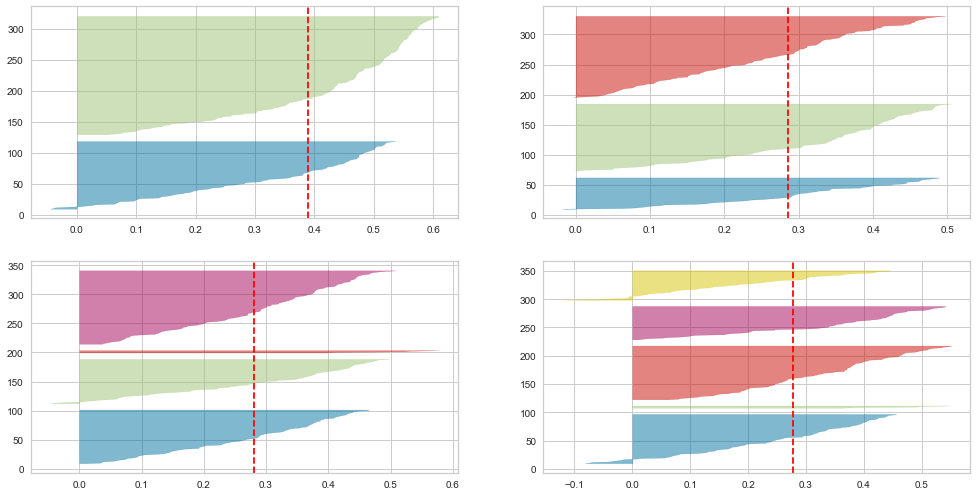

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km1 = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km1, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x_1)

The silhouette score for number of clusters=2 is the maximum, hence we will go ahead and choose the number of clusters to be 2.

In [53]:
# Applying K-means
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X)
print(labels)

[1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0
 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1
 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1
 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 0 1 1 1 0 1]


#### Princial Component Analysis
Now, we will implement PCA to reduce the dimensionality to 2D and display the clusters. 

In [55]:
from sklearn.decomposition import PCA

In [56]:
x_1

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ca  \
0     52    1   0       125   212    0        1      168      0      1.0   2   
1     53    1   0       140   203    1        0      155      1      3.1   0   
2     70    1   0       145   174    0        1      125      1      2.6   0   
3     61    1   0       148   203    0        1      161      0      0.0   1   
4     62    0   0       138   294    1        1      106      0      1.9   3   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...  ..   
723   68    0   2       120   211    0        0      115      0      1.5   0   
733   44    0   2       108   141    0        1      175      0      0.6   0   
739   52    1   0       128   255    0        1      161      1      0.0   1   
843   59    1   3       160   273    0        0      125      0      0.0   0   
878   54    1   0       120   188    0        1      113      0      1.4   1   

     thal  
0       3  
1       3  
2       3  
3       3  
4       2  
..    ...  
723     2  
733     2  
739     3  
843     2  
878     3  

[302 rows x 12 columns]

In [57]:
pca = PCA()
pca.fit(x_1)


PCA()

In [58]:
pca.explained_variance_ratio_

array([7.47012328e-01, 1.50672197e-01, 8.49607845e-02, 1.61984128e-02,
       3.69602765e-04, 2.70694285e-04, 2.15908941e-04, 9.97830268e-05,
       7.60443294e-05, 5.07108435e-05, 4.17281550e-05, 3.18060861e-05])

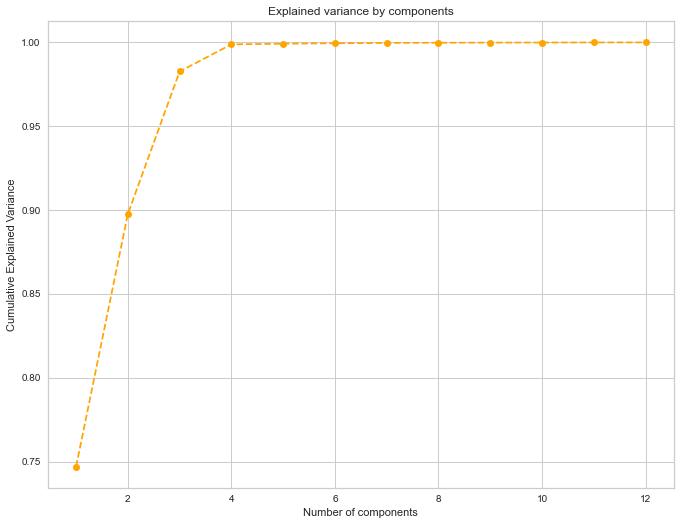

In [59]:
plt.figure(figsize = (10,8))
plt.plot(range(1,13), pca.explained_variance_ratio_.cumsum(), marker = 'o', c='orange', linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Although, the assignment's requirement is to illustrate the clusters in 2D dimension, we have also plotted the above graph that helps us in choosing the right number of components. The above graph shows the amount of variance depending on the number of components selected. A general rule of thumb is to preserve around 80% of the variance. Hence, in our case, we can go ahead and select the number of components to be 2 as it has the variance of 0.90. 

In [60]:
pca = PCA(n_components=2)

In [61]:
pca.fit(x_1)

PCA(n_components=2)

In [62]:
pca.transform(x_1)


array([[-3.49318363e+01, -1.85500270e+01],
       [-4.30848027e+01, -3.87279708e+00],
       [-7.09959927e+01,  2.95358632e+01],
       [-4.24244313e+01, -7.47890554e+00],
       [ 4.82236768e+01,  4.38759737e+01],
       [ 2.33925830e-01,  2.41546566e+01],
       [ 7.06956622e+01,  6.98006486e+00],
       [ 4.38431978e+01,  6.92902497e+00],
       [ 1.63823205e+00,  2.62499224e+00],
       [ 3.91095489e+01,  3.10898358e+01],
       [-9.75122653e+01,  2.65548336e+01],
       [ 9.39724824e+01,  9.68132930e+00],
       [-3.80743559e+01, -4.60212142e+01],
       [ 5.18192834e+01,  2.64509974e+01],
       [-4.27195871e+01, -6.38745553e+00],
       [ 6.16958430e+01,  6.63599924e+00],
       [ 1.92768541e+01,  3.84574116e+01],
       [-3.28785504e+00, -1.41653306e+01],
       [-3.49658927e+01, -1.29642886e+01],
       [-6.07879313e+01, -2.33828766e+00],
       [-2.41781792e+01,  7.31959274e+00],
       [-4.01144036e+01, -2.45045341e+00],
       [ 5.87139506e+00, -2.01326907e+01],
       [-3.

In [63]:
scores_pca = pca.transform(x_1)

#### Implementing K-means with PCA

In [64]:
kmeans_pca = KMeans(n_clusters=2, init='k-means++', random_state=42)

In [65]:
label = kmeans_pca.fit(scores_pca)
label

KMeans(n_clusters=2, random_state=42)

In [66]:
df_pca_kmeans = pd.concat([x_1.reset_index(drop=True), pd.DataFrame(scores_pca)], axis = 1)
df_pca_kmeans.columns.values[-2: ] = ['Component 1', 'Component 2']
df_pca_kmeans['K-Means PCA labels'] = kmeans_pca.labels_

Created 2 new columns and named it ‘Component 1’ and ‘Component 2’ respectively, and stored the scores_pca values under them. Next I used the kmeans_pca.labels_ method to get the labels of the model, and stored it in a new column named ‘K-Means PCA labels’.


In [67]:
df_pca_kmeans.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ca  \
0   52    1   0       125   212    0        1      168      0      1.0   2   
1   53    1   0       140   203    1        0      155      1      3.1   0   
2   70    1   0       145   174    0        1      125      1      2.6   0   
3   61    1   0       148   203    0        1      161      0      0.0   1   
4   62    0   0       138   294    1        1      106      0      1.9   3   

   thal  Component 1  Component 2  K-Means PCA labels  
0     3   -34.931836   -18.550027                   1  
1     3   -43.084803    -3.872797                   1  
2     3   -70.995993    29.535863                   1  
3     3   -42.424431    -7.478906                   1  
4     2    48.223677    43.875974                   0

In [79]:
# target counts before PCA
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

In [81]:
# target counts after PCA
df_pca_kmeans['K-Means PCA labels'].value_counts()

1    192
0    110
Name: K-Means PCA labels, dtype: int64

In [82]:
# mapping 0 to 'No heart disease' and 1 to 'Heart disease'
df_pca_kmeans['Segment'] = df_pca_kmeans['K-Means PCA labels'].map({0:'No Heart Disease', 1:'Heart Disease'})


In [83]:
df_pca_kmeans.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ca  \
0   52    1   0       125   212    0        1      168      0      1.0   2   
1   53    1   0       140   203    1        0      155      1      3.1   0   
2   70    1   0       145   174    0        1      125      1      2.6   0   
3   61    1   0       148   203    0        1      161      0      0.0   1   
4   62    0   0       138   294    1        1      106      0      1.9   3   

   thal  Component 1  Component 2  K-Means PCA labels           Segment  
0     3   -34.931836   -18.550027                   1     Heart Disease  
1     3   -43.084803    -3.872797                   1     Heart Disease  
2     3   -70.995993    29.535863                   1     Heart Disease  
3     3   -42.424431    -7.478906                   1     Heart Disease  
4     2    48.223677    43.875974                   0  No Heart Disease

#### Visualisation of the clusters in 2D

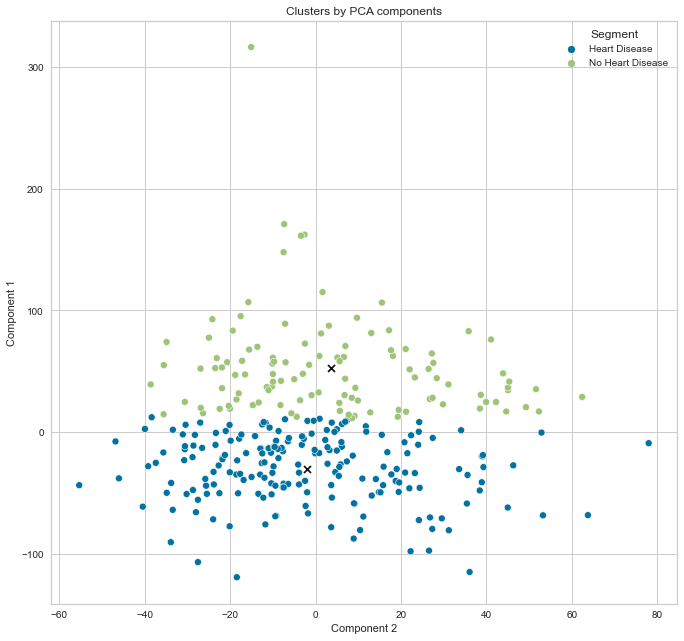

In [84]:
x_axis = df_pca_kmeans['Component 2']
y_axis = df_pca_kmeans['Component 1']
centers = np.array(kmeans_pca.cluster_centers_)
plt.figure(figsize = (10,10))
uniq = np.unique(label)

sns.scatterplot(x_axis, y_axis, hue=df_pca_kmeans['Segment'])
plt.scatter(centers[:,1], centers[:,0], marker="x", color='k')
plt.title('Clusters by PCA components')
plt.show()

### Patient Profiling

In [68]:
# added a new column of cluster ids containg kmeans_pca labels
x_1['cluster_ids'] = kmeans_pca.labels_
x_overall= x_1.describe().T


In [69]:
x_1.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ca  \
0   52    1   0       125   212    0        1      168      0      1.0   2   
1   53    1   0       140   203    1        0      155      1      3.1   0   
2   70    1   0       145   174    0        1      125      1      2.6   0   
3   61    1   0       148   203    0        1      161      0      0.0   1   
4   62    0   0       138   294    1        1      106      0      1.9   3   

   thal  cluster_ids  
0     3            1  
1     3            1  
2     3            1  
3     3            1  
4     2            0

In [70]:
x_overall

count        mean        std    min     25%    50%     75%    max
age          302.0   54.420530   9.047970   29.0   48.00   55.5   61.00   77.0
sex          302.0    0.682119   0.466426    0.0    0.00    1.0    1.00    1.0
cp           302.0    0.963576   1.032044    0.0    0.00    1.0    2.00    3.0
trestbps     302.0  131.602649  17.563394   94.0  120.00  130.0  140.00  200.0
chol         302.0  246.500000  51.753489  126.0  211.00  240.5  274.75  564.0
fbs          302.0    0.149007   0.356686    0.0    0.00    0.0    0.00    1.0
restecg      302.0    0.526490   0.526027    0.0    0.00    1.0    1.00    2.0
thalach      302.0  149.569536  22.903527   71.0  133.25  152.5  166.00  202.0
exang        302.0    0.327815   0.470196    0.0    0.00    0.0    1.00    1.0
oldpeak      302.0    1.043046   1.161452    0.0    0.00    0.8    1.60    6.2
ca           302.0    0.718543   1.006748    0.0    0.00    0.0    1.00    4.0
thal         302.0    2.314570   0.613026    0.0    2.00    2.0    3.00    3.0
cluster_ids  302.0    0.635762   0.482015    0.0    0.00    1.0    1.00    1.0

In [71]:
# added a new column 'Mean'
x_overall['Mean'] = x_overall[['mean']]


In [72]:
x_overall.head()

count        mean        std    min    25%    50%     75%    max  \
age       302.0   54.420530   9.047970   29.0   48.0   55.5   61.00   77.0   
sex       302.0    0.682119   0.466426    0.0    0.0    1.0    1.00    1.0   
cp        302.0    0.963576   1.032044    0.0    0.0    1.0    2.00    3.0   
trestbps  302.0  131.602649  17.563394   94.0  120.0  130.0  140.00  200.0   
chol      302.0  246.500000  51.753489  126.0  211.0  240.5  274.75  564.0   

                Mean  
age        54.420530  
sex         0.682119  
cp          0.963576  
trestbps  131.602649  
chol      246.500000

In [73]:
# Converting it into a dataframe consiting of only mean values
x_overall_1 = x_overall[['Mean']]
x_overall_1

Mean
age           54.420530
sex            0.682119
cp             0.963576
trestbps     131.602649
chol         246.500000
fbs            0.149007
restecg        0.526490
thalach      149.569536
exang          0.327815
oldpeak        1.043046
ca             0.718543
thal           2.314570
cluster_ids    0.635762

In [74]:
cluster_summary = x_1.groupby('cluster_ids').describe().T.reset_index()
cluster_summary =cluster_summary.rename(columns={'level_0':'column','level_1':'metric'})

cluster_summary = cluster_summary[cluster_summary['metric'] == "mean"]

cluster_summary

cluster_ids    column metric           0           1
1                 age   mean   56.654545   53.140625
9                 sex   mean    0.581818    0.739583
17                 cp   mean    0.818182    1.046875
25           trestbps   mean  134.918182  129.703125
33               chol   mean  298.909091  216.473958
41                fbs   mean    0.136364    0.156250
49            restecg   mean    0.445455    0.572917
57            thalach   mean  145.836364  151.708333
65              exang   mean    0.400000    0.286458
73            oldpeak   mean    1.155455    0.978646
81                 ca   mean    0.836364    0.651042
89               thal   mean    2.409091    2.260417

The above table gives us the mean of both the labels (0 and 1) for each feature. This basically gives us the overall profile of the dataset, and the average of each feature, giving us an idea of what the overall statistics look like. 

#### Rand Index measure
Below I'll be calculating the Rand score using the rand_score module. The Rand index has values between 0 and 1, where a value of 0 represents that the 2 clusters do not agree on any pair of points, whereas a value of 1 indicates that the data clusters are exactly the same. 

In [74]:
from sklearn.metrics.cluster import rand_score

In [75]:
# labels obtained after implementing k-means
labels 

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,

In [76]:
# converting dataframe into 1D array
y_1 = y.values.ravel()
y_1

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,

In [77]:
rand_score(labels, y_1)

0.5099777782667048

We got a rand score of 0.50, suggesting that the 2 clusters are similar to each other on approximately half of the datapoints. 

#### Splitting the data into train and test set

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

In [86]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(211, 13)

(91, 13)

(211, 1)

(91, 1)

#### Naive Bayes Model 

In [87]:
from sklearn import naive_bayes
from sklearn import metrics
classifier = naive_bayes.GaussianNB()
mymodel1 = classifier.fit(X_train, y_train)
mymodel1

GaussianNB()

In [88]:
y_pred= classifier.predict(X_test)

In [89]:
print('Accuracy Score')
print(metrics.accuracy_score(y_test, y_pred))

Accuracy Score
0.8351648351648352


As we can see, the accuracy of the naive bayes model is 83.51%.

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        48
           1       0.78      0.91      0.84        43

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.83        91



In [91]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8387096774193548

#### Decision tree model

In [92]:
from sklearn import tree


In [93]:
classifier_2 = tree.DecisionTreeClassifier()
mymodel2 = classifier_2.fit(X_train, y_train)
mymodel2


DecisionTreeClassifier()

In [94]:
y_pred_2 = classifier_2.predict(X_test)

In [95]:
print('Accuracy Score')
print(metrics.accuracy_score(y_test, y_pred_2))

Accuracy Score
0.7142857142857143


The accuarcy of the decision tree classifier is 73.62%, which is low as compared to the accuracy of the naive bayes model (83.51%). 

In [96]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        48
           1       0.69      0.72      0.70        43

    accuracy                           0.71        91
   macro avg       0.71      0.71      0.71        91
weighted avg       0.72      0.71      0.71        91



In [97]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_2)

0.7045454545454545

In [98]:
feature_names = X_train.keys()
col_names = ['Heart Disease', 'No heart disease']


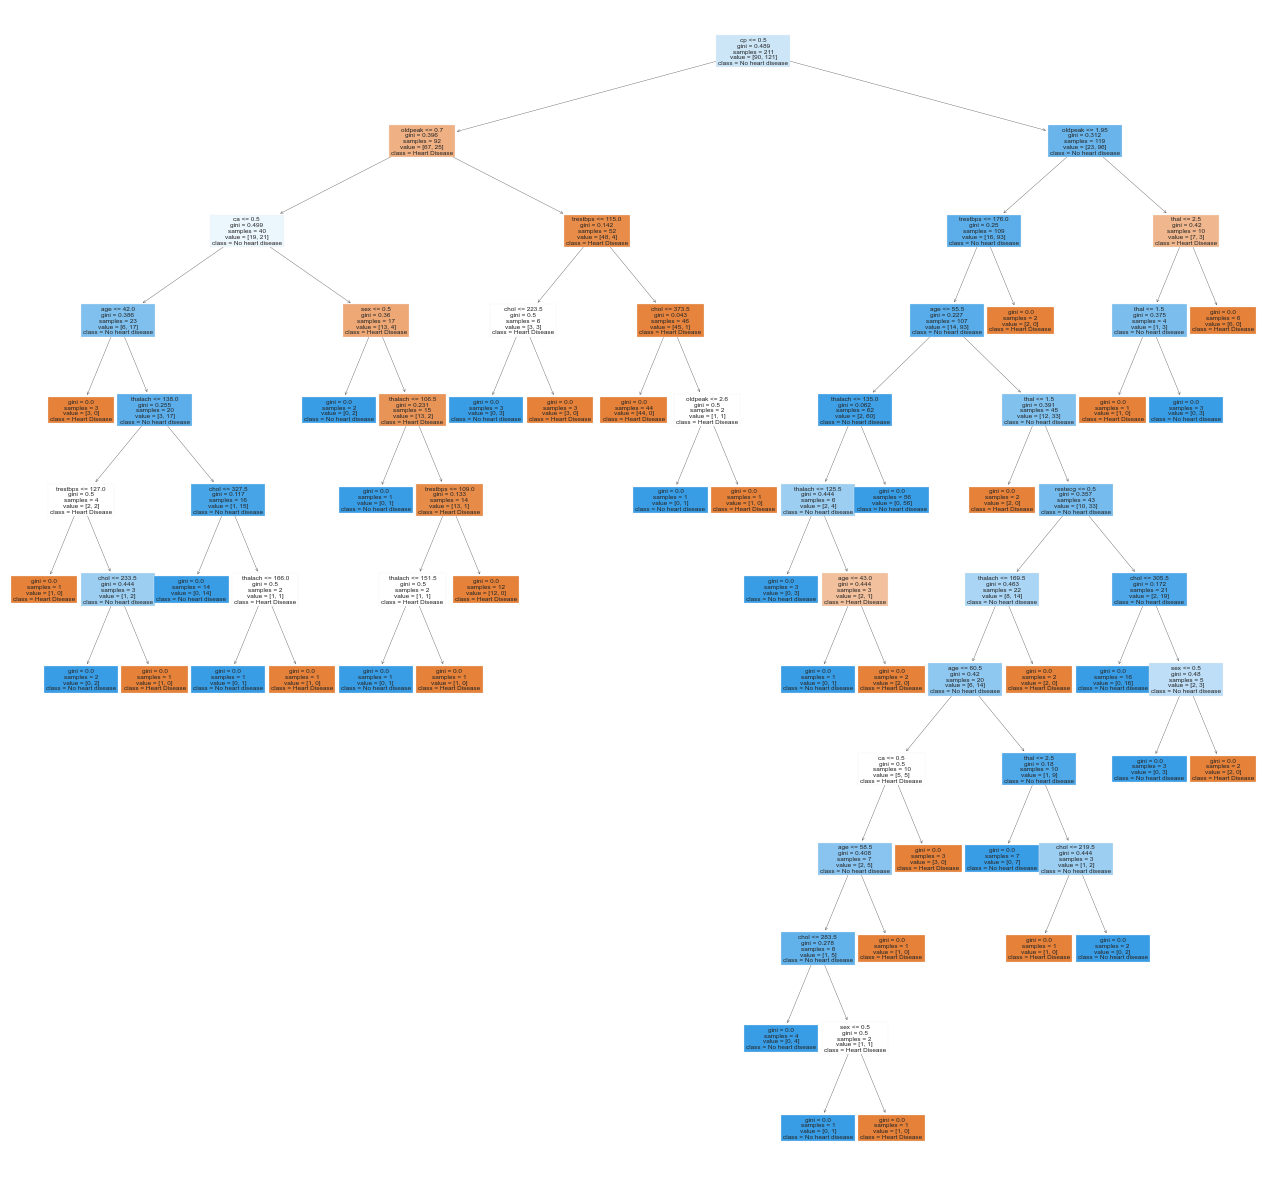

In [99]:
# plotting the tree
plt.figure(figsize=(20,20))
tree.plot_tree(mymodel2, feature_names=feature_names, class_names=col_names, filled=True)
plt.show()

#### Statistical significance test

To compare the preformance of the Naive Bayes model and the Decision tree model, we will perform the statistical significance test.

In [100]:
from scipy import stats
from mlxtend.evaluate import paired_ttest_5x2cv

In [101]:
t, p = paired_ttest_5x2cv(estimator1=mymodel1, estimator2=mymodel2, X=x_1, y=y)
alpha =0.05

print('t statistic: %.3f' % t)
print('aplha ', alpha)
print('p value: %.3f' % p)

if p > alpha:
    print("Failed to reject null hypotesis since p-value > 0.05")
else:
    print("We can reject null hypotesis since p-value < 0.05. Hence we can conclude that both the models are significantly different.")

t statistic: 2.795
aplha  0.05
p value: 0.038
We can reject null hypotesis since p-value < 0.05. Hence we can conclude that both the models are significantly different.
